In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d


In [2]:
class NeuralNet():
    def __init__(self, num_features, num_hidden_1, num_out,eta):
        
        #first hidden layer
        self.weight_1 = np.zeros((num_hidden_1, num_features))#10* 2
        self.bias_1= np.zeros((num_hidden_1,1)) #10*1
        
        #output
        self.weight_out = np.zeros((num_out, num_hidden_1)) # 1* 10
        self.bias_out= np.zeros((num_out,1)) # 1*1
        
        self.eta=eta
            
    def relu(self,z):
        return np.where(z > 0, z, 0)
    
    def relu_derive(self,p):
        return 1. * (p > 0.0)
    
    def sigmoid_derive(self,p):
        return p * (1 - p)
    
    def sigmoid(self,z):
        return 1. / (1. + np.exp(-z))
    
    def forward(self, x):
       # output of hidden layer neurons
        #print(self.bias_1)
        #print(self.weight_1)
        hid_out =  self.relu((np.matmul(self.weight_1,x) + self.bias_1)) #10*1
        #print(hid_out)
        #print((np.matmul(self.weight_1,x) + self.bias_1)*(np.matmul(self.weight_1,x) + self.bias_1) > 0.0)
        #print(self.weight_out.shape)
        #print(self.bias_out.shape)
        #output node
        out = self.sigmoid(np.matmul(self.weight_out,hid_out).reshape(-1,1) + self.bias_out) # 1*1
        return hid_out, out 
    
    def cost_fun(self, yhat, y):
        return (yhat- y)**2
        
    def back_prop(self, hid_out, yhat, y):
        #derive_weight_1= 2*(yhat-y) * self.sigmoid_derive(yhat) * self.weight_out * self.relu_derive(hid_out) * x 
        #derivative of weights
        derive_weight_out= np.dot(hid_out.T,(2*(yhat-y) * self.sigmoid_derive(yhat))) #1*10
        derive_weight_1 = np.dot(np.dot((2*(yhat-y) * self.sigmoid_derive(yhat) * self.weight_out).T, self.relu_derive(hid_out)),x.T) #10*2 
        
        #derivative of bias
        derive_bias_out = 2*(yhat-y) * self.sigmoid_derive(yhat) #1*1
        derive_bias_1 = np.dot((2*(yhat-y) * self.sigmoid_derive(yhat) * self.weight_out).T, self.relu_derive(hid_out)) #10*1
        
        #update weights
        self.weight_out -= self.eta* derive_weight_out
        self.weight_1 -=self.eta*  derive_weight_1
        
        #update bias
        self.bias_out -= self.eta* derive_bias_out
        self.bias_1 -= self.eta* derive_bias_1
        

In [3]:
model=NeuralNet(2, 10, 1, 0.01)
model.weight_1= np.ones((10,2))
model.bias_1= np.ones((10,1))
model.weight_out = np.ones((1, 10)) # 1* 10
model.bias_out=np.ones((1, 1))


In [4]:
X=np.array([[1,1],[1,-1],[-1,-1]])

for eg in range(X.shape[0]):
    data= X[eg].reshape(-1,1)
    hid_out, yhat = model.forward(data)
    print('-----')
    print('Outputs y and Oi for x=',data)
    print('Oi: from each of the 10 neurons in the hidden layer\n',hid_out)
    print('y:', yhat)

-----
Outputs y and Oi for x= [[1]
 [1]]
Oi: from each of the 10 neurons in the hidden layer
 [[3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]
y: [[1.]]
-----
Outputs y and Oi for x= [[ 1]
 [-1]]
Oi: from each of the 10 neurons in the hidden layer
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
y: [[0.9999833]]
-----
Outputs y and Oi for x= [[-1]
 [-1]]
Oi: from each of the 10 neurons in the hidden layer
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
y: [[0.73105858]]


In [5]:
model2=NeuralNet(2, 10, 1, 0.01)

#np.random.seed(1)
model2.weight_1= np.random.normal(0, 1, (10, 2))
print(model2.weight_1)

#np.random.seed(2)
model2.bias_1= np.random.normal(0, 1, (10, 1))
print(model2.bias_1)

#np.random.seed(3)
model2.weight_out = np.random.normal(0, 1, (1, 10)) # 1* 10
print(model2.weight_out)

#np.random.seed(4)
model2.bias_out= np.random.normal(0, 1, (1,1))
print(model2.bias_out)

[[ 1.24931063  0.36342203]
 [-0.99201822  0.90251565]
 [-1.551069   -0.64583795]
 [ 1.34163697 -0.70627083]
 [-0.21822508  0.76813126]
 [ 0.08720783  0.64525975]
 [-0.47951992 -1.06200748]
 [-1.15749542 -0.4613625 ]
 [-0.33144537  0.94368811]
 [-0.34898886 -0.33918845]]
[[-0.36883642]
 [-1.87244414]
 [ 0.41244773]
 [-1.24688547]
 [-0.4736753 ]
 [ 0.20187766]
 [ 0.31661615]
 [ 0.96846409]
 [ 0.68009729]
 [ 1.05031271]]
[[ 0.87287076 -1.90085513 -0.13880079 -1.2688548  -0.55569895 -0.31058299
  -0.68522137  2.91119147 -1.88734614 -0.38671053]]
[[-0.60568248]]


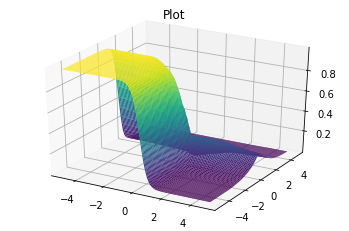

In [6]:

fig = plt.figure()
ax = plt.axes(projection='3d')
a=np.arange(-5, 5, 0.1)
b=np.arange(-5, 5, 0.1)
A, B = np.meshgrid(a, b)
positions = np.vstack([A.ravel(), B.ravel()])
points_count=positions.shape[1]
y_row=np.zeros([points_count,1])
    
for i in range(points_count):
    dataPoint = np.array(positions[:,i]).reshape(-1,1)
    hidden_out, yhat = model2.forward(dataPoint)
    y_row[i] = yhat
yhat_plot= y_row.reshape(A.shape[0],A.shape[1])

ax.plot_surface(A,B, yhat_plot, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Plot'); 

In [7]:
class NeuralNet2():
    def __init__(self, num_features, num_hidden_1, num_hidden_2,num_hidden_3,num_hidden_4,num_hidden_5, num_out):
        
        self.weight_1 = np.zeros((num_hidden_1, num_features))#2* 2
        self.bias_1= np.zeros((num_hidden_1,1)) #2*1
        
        self.weight_2 = np.zeros((num_hidden_2, num_hidden_1))#2* 2
        self.bias_2= np.zeros((num_hidden_2,1)) #2*1
        
        self.weight_3 = np.zeros((num_hidden_3, num_hidden_2))#2* 2
        self.bias_3= np.zeros((num_hidden_3,1)) #2*1
        
        self.weight_4 = np.zeros((num_hidden_4, num_hidden_3))#2* 2
        self.bias_4= np.zeros((num_hidden_4,1)) #2*1
        
        self.weight_5 = np.zeros((num_hidden_5, num_hidden_4))#2* 2
        self.bias_5= np.zeros((num_hidden_5,1)) #2*1
        
        #output
        self.weight_out = np.zeros((num_out, num_hidden_5)) # 1* 2
        self.bias_out= np.zeros((num_out,1)) # 1*1
                    
    def relu(self,z):
        return np.where(z > 0, z, 0)
    
    def sigmoid(self,z):
        #print('sig',z)
        return 1. / (1. + np.exp(-z))
    
    def forward(self, x):
       # output of hidden layer neurons

        h1 =  self.relu((np.matmul(self.weight_1,x) + self.bias_1)) #2*1
        h2 =  self.relu((np.matmul(self.weight_2,h1) + self.bias_2))
        h3 =  self.relu((np.matmul(self.weight_3,h2) + self.bias_3))
        h4 =  self.relu((np.matmul(self.weight_4,h3) + self.bias_4))
        h5 =  self.relu((np.matmul(self.weight_5,h4) + self.bias_5))

        
        out=self.sigmoid(np.matmul(self.weight_out,h5).reshape(-1,1) + self.bias_out)
        return h1,h2,h3,h4,h5,out 
    
        
    def back_prop(self, hid_out, yhat, y):
        None
        

In [8]:
modelType2=NeuralNet2(2, 2,2,2,2,2, 1)

modelType2.weight_1= np.ones((2,2))
modelType2.bias_1= np.ones((2,1))
modelType2.weight_2= np.ones((2,2))
modelType2.bias_2= np.ones((2,1))
modelType2.weight_3= np.ones((2,2))
modelType2.bias_3= np.ones((2,1))
modelType2.weight_4= np.ones((2,2))
modelType2.bias_4= np.ones((2,1))
modelType2.weight_5= np.ones((2,2))
modelType2.bias_5= np.ones((2,1))

modelType2.weight_out = np.ones((1, 2)) # 1* 2
modelType2.bias_out=np.ones((1, 1))


X=np.array([[1,1],[1,-1],[-1,-1]])

for eg in range(X.shape[0]):
    data= X[eg].reshape(-1,1)
    h1,h2,h3,h4,h5, yhat = modelType2.forward(data)
    print('-----')
    print('Outputs y and Oi for x=',data)
    print('Oi:\n',h1)
    print(h2)
    print(h3)
    print(h4)
    print(h5)
    print('y:', yhat)


-----
Outputs y and Oi for x= [[1]
 [1]]
Oi:
 [[3.]
 [3.]]
[[7.]
 [7.]]
[[15.]
 [15.]]
[[31.]
 [31.]]
[[63.]
 [63.]]
y: [[1.]]
-----
Outputs y and Oi for x= [[ 1]
 [-1]]
Oi:
 [[1.]
 [1.]]
[[3.]
 [3.]]
[[7.]
 [7.]]
[[15.]
 [15.]]
[[31.]
 [31.]]
y: [[1.]]
-----
Outputs y and Oi for x= [[-1]
 [-1]]
Oi:
 [[0.]
 [0.]]
[[1.]
 [1.]]
[[3.]
 [3.]]
[[7.]
 [7.]]
[[15.]
 [15.]]
y: [[1.]]


In [9]:
## weights normally distributed

modelType=NeuralNet2(2, 2,2,2,2,2, 1)

modelType.weight_1= np.random.normal(0, 1, (2, 2))
#print(modelType.weight_1)
modelType.bias_1= np.random.normal(0, 1, (2, 1))
#print(modelType.bias_1)

        
modelType.weight_2 = np.random.normal(0, 1, (2, 2))#2* 2
modelType.bias_2= np.random.normal(0, 1, (2, 1)) #2*1
        
modelType.weight_3 = np.random.normal(0, 1, (2, 2)) #2* 2
modelType.bias_3= np.random.normal(0, 1, (2, 1)) #2*1
        
modelType.weight_4 = np.random.normal(0, 1, (2, 2))#2* 2
modelType.bias_4= np.random.normal(0, 1, (2, 1)) #2*1
        
modelType.weight_5 = np.random.normal(0, 1, (2, 2))#2* 2
modelType.bias_5= np.random.normal(0, 1, (2, 1))#2*1
        
#output
modelType.weight_out = np.random.normal(0, 1, (1, 2)) # 1* 2
modelType.bias_out= np.random.normal(0, 1, (1,1)) # 1*1


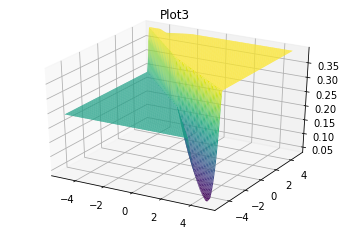

In [10]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
a=np.arange(-5, 5, 0.1)
b=np.arange(-5, 5, 0.1)

A, B = np.meshgrid(a, b)
positions = np.vstack([A.ravel(), B.ravel()])
points_count=positions.shape[1]

y_row=np.zeros([points_count,1])

for i in range(points_count):
    dataPoint = np.array(positions[:,i]).reshape(-1,1)
    h1,h2,h3,h4,h5, yhat = modelType.forward(dataPoint)
    y_row[i] = yhat
yhat_plot= y_row.reshape(A.shape[0],A.shape[1])

ax2.plot_surface(A,B, yhat_plot, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax2.set_title('Plot3');

## Backpropogation

In [11]:
class NeuralNet3():
    def __init__(self, num_features, num_hidden_1, num_out,eta):
        
        #first hidden layer
        self.weight_1 = np.zeros((num_hidden_1, num_features))#2* 2
        self.bias_1= np.zeros((num_hidden_1,1)) #2*1
        
        #output
        self.weight_out = np.zeros((num_out, num_hidden_1)) # 1* 2
        
        self.bias_out= np.zeros((num_out,1)) # 1*1
        
        self.eta=eta
            
    def relu(self,z):
        return np.where(z > 0, z, 0)
    
    def relu_derive(self,p):
        return 1. * (p >= 0.0)
    
    def sigmoid_derive(self,p):
        return p * (1 - p)
    
    def sigmoid(self,z):
        return 1. / (1. + np.exp(-z))
    
    def forward(self, x):
        self.inputX=x
        u_hidden=(np.matmul(self.weight_1,x) + self.bias_1)
        hid_out =  self.relu(u_hidden) #2*1
        u_C= np.matmul(self.weight_out,hid_out).reshape(-1,1) + self.bias_out
        out = self.sigmoid(u_C) # 1*1
        printObj=u_hidden.item(0),hid_out.item(0),u_hidden.item(1),hid_out.item(1),u_C.item(0),out.item(0)
        return u_hidden, hid_out, out, printObj 
    
    def cost_fun(self, yhat, y):
       # print('yhat',yhat)
        #print('y',y)
        return 0.5* (yhat- y)**2
        
    def back_prop(self, hid_in, hid_out, yhat, y):
        
        #derivatives
        E=self.cost_fun( yhat, y)
        dE_vC=(yhat-y)# 1*1
        dE_uC=dE_vC * self.sigmoid_derive(yhat) # 1*1
        ## this will be a sum if more than one output node
        dE_vj= dE_uC * self.weight_out #1*2
        dE_uj =np.multiply(dE_vj.T ,self.relu_derive(hid_in)) #2*1
        
        
        #derivatives of weights
        derive_weight_out= hid_out.T * dE_uC #1*2
        derive_weight_1 = np.dot(dE_uj,self.inputX.T) #2*2 
        
        #derivative of bias
        derive_bias_out = dE_uC #1*1
        derive_bias_1 = dE_uj #2*1
        
        #update weights
        self.weight_out -= self.eta * derive_weight_out
        self.weight_1 -=self.eta *  derive_weight_1
        
        #update bias
        self.bias_out -= self.eta * derive_bias_out
        self.bias_1 -= self.eta * derive_bias_1 
        
        outLayerDerivs=[E.item(0),dE_vC.item(0), dE_uC.item(0)]
        hidLayerDerivs=[dE_vj.item(0),dE_uj.item(0), dE_vj.item(1), dE_uj.item(1)]
        weightDerivs=[derive_bias_1.item(0), derive_weight_1.item(0),derive_weight_1.item(1),derive_bias_1.item(1), derive_weight_1.item(2) ,derive_weight_1.item(3),derive_bias_out.item(0),derive_weight_out.item(0),derive_weight_out.item(1)]
        
        weightsUpdate=[self.bias_1.item(0), self.weight_1.item(0),self.weight_1.item(1),self.bias_1.item(1), self.weight_1.item(2) ,self.weight_1.item(3),self.bias_out.item(0),self.weight_out.item(0),self.weight_out.item(1)]
        return outLayerDerivs, hidLayerDerivs, weightDerivs, weightsUpdate
        

In [12]:
modelBack=NeuralNet3(2, 2, 1, 0.1)

In [13]:
##Q1,2,3
#trial

#weights=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
#xInput=np.array([[1],[-1]])
#y=1

##q1## 0.00000 0.00000 0.30000 0.30000 0.97000 0.72512
##q2## 0.03778 -0.27488 -0.05479
##q3## -0.04383 -0.04383 -0.04931 -0.04931
##q4## -0.04383 -0.04383 0.04383 -0.04931 -0.04931 0.04931 -0.05479 0.00000 -0.01644
 

#weights=[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2]
#xInput=np.array([[-0.2],[1.7]])
#y=0

##q1## 2.18000 2.18000 1.43000 1.43000 1.34000 0.79249
##q2## 0.31402 0.79249 0.13032
##q3## 0.03910 0.03910 0.02606 0.02606
##q4## 0.03910 -0.00782 0.06647 0.02606 -0.00521 0.04431 0.13032 0.28411 0.18636


#weights=[4,3,2,1,0,-1,-2,-3,-4]
#xInput=np.array([[-4],[1]])
#y=0

##q1## -6.00000 0.00000 0.00000 0.00000 -2.00000 0.11920
##q2##  0.00710 0.11920 0.01252
##q3## -0.03755 0.00000 -0.05006 -0.05006
##q4## 0.00000 0.00000 0.00000 -0.05006 0.20025 -0.05006 0.01252 0.00000 0.00000

#test
weights= [0.1,-0.2,0.3,-0.4,0.5,-0.6,0.7,-0.8,0.9]
xInput=np.array([[1],[-1]])  
y=1

In [14]:
#UPTO Q4

modelBack.weight_1= np.array([[weights[1], weights[2]],[weights[4], weights[5]]],dtype=np.float64)
modelBack.bias_1= np.array([[weights[0]],[weights[3]]],dtype=np.float64)

modelBack.weight_out = np.array([[weights[7],weights[8]]],dtype=np.float64) # 1* 2
modelBack.bias_out=np.array([[weights[6]]],dtype=np.float64)
hid_in, hid_out, yhat, outPrintList= modelBack.forward(xInput)

outLayerDerivs, hidLayerDerivs ,weightDerivs,weightsUpdate= modelBack.back_prop(hid_in, hid_out, yhat, y)

print('net and activated outputs of the network')
print(*outPrintList)
print('-----')
print('Derivatives')
print('E, derivatives of E with respect to vC and uC respectively ');print(*outLayerDerivs) ;print('\n')
print('Derivatives of E with respect to vA, uA , vB, uB respectively ');print(*hidLayerDerivs) ;print('\n')
print('Derivatives of E with respect to w1,w2,w3,w4,w5,w6,w7,w8,w9');print(*weightDerivs)



net and activated outputs of the network
-0.4 0.0 0.7000000000000001 0.7000000000000001 1.33 0.7908406347869368
-----
Derivatives
E, derivatives of E with respect to vC and uC respectively 
0.02187382002816578 -0.20915936521306322 -0.034597411432579675


Derivatives of E with respect to vA, uA , vB, uB respectively 
0.02767792914606374 0.0 -0.031137670289321708 -0.031137670289321708


Derivatives of E with respect to w1,w2,w3,w4,w5,w6,w7,w8,w9
0.0 0.0 -0.0 -0.031137670289321708 -0.031137670289321708 0.031137670289321708 -0.034597411432579675 -0.0 -0.024218188002805775


In [15]:
#q5

modelBack.weight_1= np.array([[weights[1], weights[2]],[weights[4], weights[5]]],dtype=np.float64)
modelBack.bias_1= np.array([[weights[0]],[weights[3]]],dtype=np.float64)

modelBack.weight_out = np.array([[weights[7],weights[8]]],dtype=np.float64) # 1* 2
modelBack.bias_out=np.array([[weights[6]]],dtype=np.float64)

hid_in, hid_out, yhat, outPrintList= modelBack.forward(xInput)

outLayerDerivs, hidLayerDerivs ,weightDerivs,weightsUpdate= modelBack.back_prop(hid_in, hid_out, yhat, y)

print('OLD WEIGHTS:',*np.array(weights, dtype=np.float64))
print('ERROR E UNDER OLD WEIGHTS:',outLayerDerivs[0])
print('UPDATED WEIGHTS:',*weightsUpdate)
update_hid_in, update_hid_out, update_yhat, update_outPrintList= modelBack.forward(xInput)
error=modelBack.cost_fun( update_yhat, y)
print('E:',error.item(0))


OLD WEIGHTS: 0.1 -0.2 0.3 -0.4 0.5 -0.6 0.7 -0.8 0.9
ERROR E UNDER OLD WEIGHTS: 0.02187382002816578
UPDATED WEIGHTS: 0.1 -0.2 0.3 -0.39688623297106784 0.5031137670289322 -0.6031137670289322 0.7034597411432579 -0.8 0.9024218188002806
E: 0.0214081824552301


In [16]:
#q6

dX1,dY = [], []
features=['x1','x2']

with open('data.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            values = line.split(' ')
        else:
            continue
        #pick first 2
        dX1.append([float(i) for i in values[:2]])
        dY.append(int(values[-1]))
dX1=np.array(dX1)
dY=np.array(dY)
dataset_len=dX1.shape[0]
print(dataset_len)
print(dX1)
print(dX1[0].reshape(2,-1))


760
[[0.637257 0.558213]
 [0.029207 0.485894]
 [0.23225  0.36303 ]
 ...
 [0.960783 0.053292]
 [0.706236 0.896229]
 [0.484345 0.037497]]
[[0.637257]
 [0.558213]]


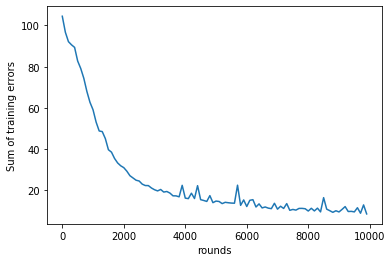

In [19]:
modelEE = NeuralNet3(2, 2, 1, 0.1)
weights= [0.1,-0.2,0.3,-0.4,0.5,-0.6,0.7,-0.8,0.9]

modelEE.weight_1= np.array([[weights[1], weights[2]],[weights[4], weights[5]]],dtype=np.float64)
modelEE.bias_1= np.array([[weights[0]],[weights[3]]],dtype=np.float64)

modelEE.weight_out = np.array([[weights[7],weights[8]]],dtype=np.float64) # 1* 2
modelEE.bias_out=np.array([[weights[6]]],dtype=np.float64)

rounds=10000
errorList=[]

for ro in range(rounds):
    rand=np.random.randint(0,dataset_len)
    selX=dX1[rand].reshape(-1,1); selY=dY[rand]
    
    #forward
    hid_in, hid_out, yhat, printList = modelEE.forward(selX)
    #backprop
    outDerivs, hidDerivs ,wDerivs, wUpdate = modelEE.back_prop(hid_in, hid_out, yhat, selY)
    #estimate test error for every 100 rounds
    if not (ro % 100):
        error=0 
        #print('test', modelEE.weight_1)
        weights=wUpdate
        modelEE.weight_1= np.array([[weights[1], weights[2]],[weights[4], weights[5]]],dtype=np.float32)
        modelEE.bias_1= np.array([[weights[0]],[weights[3]]],dtype=np.float32)

        modelEE.weight_out = np.array([[weights[7],weights[8]]],dtype=np.float32) # 1* 2
        modelEE.bias_out=np.array([[weights[6]]],dtype=np.float32)
        
        for data_point in range(dataset_len):
            t_hid_in, t_hid_out, t_yhat, t_outPrintList = modelEE.forward(dX1[data_point].reshape(-1,1)) 
            error+= modelEE.cost_fun(t_yhat, dY[data_point]).item(0)
        errorList.append(error)
        
plt.plot([(i)*100 for i in range(len(errorList))], errorList)
plt.ylabel('Sum of training errors')
plt.xlabel('rounds')
plt.show()
